In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [24]:
# 데이터 불러오기

boston = pd.read_csv("./data/Boston_house.csv")

In [25]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [26]:
# target 제외한 데이터만 뽑기
boston_data = boston.drop(['Target'], axis=1)

In [27]:
# data 통계
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [28]:
'''
타켓 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM 자치시(town) 별 1인당 범죄율
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) 
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
LSTAT 모집단의 하위계층의 비율(%)  
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

'''

'\n타켓 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM 자치시(town) 별 1인당 범죄율\nZN 25,000 평방피트를 초과하는 거주지역의 비율  \nINDUS 비소매상업지역이 점유하고 있는 토지의 비율  \nCHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0) \nNOX 10ppm 당 농축 일산화질소  \nRM 주택 1가구당 평균 방의 개수  \nAGE 1940년 이전에 건축된 소유주택의 비율  \nDIS 5개의 보스턴 직업센터까지의 접근성 지수  \nRAD 방사형 도로까지의 접근성 지수  \nTAX 10,000 달러 당 재산세율  \nPTRATIO 자치시(town)별 학생/교사 비율  \nB 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  \nLSTAT 모집단의 하위계층의 비율(%)  \nMEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)\n\n'

## crim/rm/lstat 세개의 변수로 각각 단순 선형 회귀 분석하기

In [29]:
## 변수 설정
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat = boston[['LSTAT']]

## target ~ crim 선형회귀분석

In [30]:
# crim 변수에 상수항추가하기

crim1 = sm.add_constant(crim, has_constant="add")
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [31]:
# sm.OLS 적합시키기
model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

In [32]:
# summary 함수통해 결과 출력
fitted_model1.summary()

# R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.17e-19
Time:                        19:47:47   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# 회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

### y_hat = beta0 + beta1 * X 계산

In [34]:
# 회귀계수 x 데이터(X)
np.dot(crim1, fitted_model1.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [35]:
## predict 함수를 통해 yhat 구하기
pred1 = fitted_model1.predict(crim1)

In [36]:
# 직접 구한 yhat과 predict 함수를 통해 구한 yhat 차이
np.dot(crim1, fitted_model1.params) - pred1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

## 적합시킨 직선 시각화

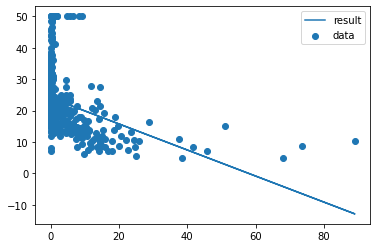

In [37]:
# 왼쪽 위 부분이 잘 맞지 않음. 직선이 잘 맞지 않음
import matplotlib.pyplot as plt
plt.scatter(crim, target, label='data')
plt.plot(crim, pred1, label='result')
plt.legend()
plt.show()

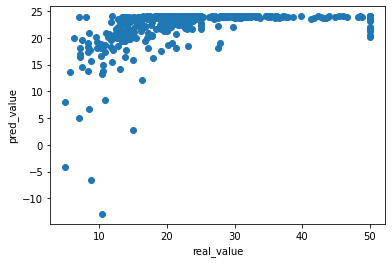

In [38]:
# 직선이 잘 맞지 않음.
plt.scatter(target, pred1)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

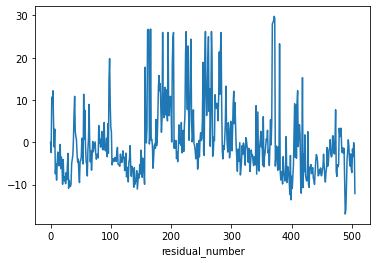

In [39]:
# residual(잔차) 시각화
# 균일하게 되어있지 않음. --> 범죄를 가지고 집값을 예측하긴 어려움.
fitted_model1.resid.plot()
plt.xlabel('residual_number')
plt.show()

In [40]:
# 잔차의 합 계산
np.sum(fitted_model1.resid)

-3.524291969370097e-12

## rm 변수와 lstat 변수로 단순선형회귀분석 적합시키기

In [41]:
# 상수항 추가
rm1 = sm.add_constant(rm, has_constant="add")
lstat1 = sm.add_constant(lstat, has_constant="add")

In [42]:
# 회귀모델 적합
model2 = sm.OLS(target, rm1)
fitted_model2 = model2.fit()
model3 = sm.OLS(target, lstat1)
fitted_model3 = model3.fit()

In [43]:
# rm모델 결과 출력
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.49e-74
Time:                        19:47:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# lstat모델 결과 출력
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           5.08e-88
Time:                        19:47:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# 각각 yhat_예측하기
pred2 = fitted_model2.predict(rm1)
pred3 = fitted_model3.predict(lstat1)

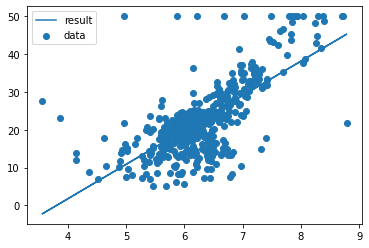

In [46]:
# rm모델 시각화
import matplotlib.pyplot as plt
plt.scatter(rm, target, label='data')
plt.plot(rm, pred2, label='result')
plt.legend()
plt.show()

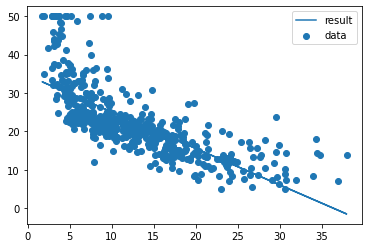

In [47]:
# lstat모델 시각화
import matplotlib.pyplot as plt
plt.scatter(lstat, target, label='data')
plt.plot(lstat, pred3, label='result')
plt.legend()
plt.show()

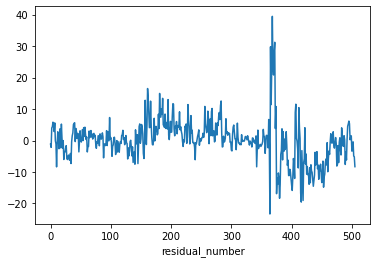

In [48]:
# rm residual(잔차) 시각화
fitted_model2.resid.plot()
plt.xlabel('residual_number')
plt.show()

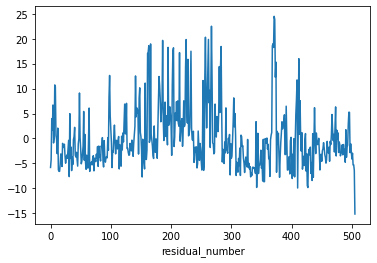

In [49]:
# lstat residual(잔차) 시각화
fitted_model3.resid.plot()
plt.xlabel('residual_number')
plt.show()

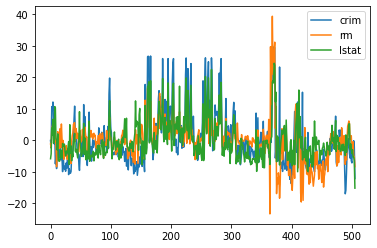

In [50]:
# 세모델의 residual 비교
fitted_model1.resid.plot(label='crim')
fitted_model2.resid.plot(label='rm')
fitted_model3.resid.plot(label='lstat')
plt.legend()

# 다중선형회귀분석_실습

## crim, rm, lstat 세개의 변수를 통해 다중회귀적합

In [53]:
## boston data에서 crim, rm, lstat 변수만 뽑아오기

x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [54]:
# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant='add')

In [55]:
# 회귀모델 적합

multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [56]:
# summary함수를 통해 결과출력

fitted_multi_model.summary()  # R-squared : y의 총 변동에 대해서 x가 설명하는 변동의 비율

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          1.01e-112
Time:                        19:53:52   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 단순선형회귀모델의 회귀계수와 비교


In [57]:
## 단순선형회귀모델의 회귀계수

print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [59]:
## 다중선형회귀모델의 회귀 계수

print(fitted_multi_model.params)
## 세 변수가 각각 설명하는 y의 변동 비율이 겹친다.  --> 다중 공선성이 있지만 p-value가 낮기 때문에 회귀모델을 쓰는게 나쁘지 않음

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


## 행렬연산을 통해 beta 구하기

In [64]:
from numpy import linalg  ## 역행렬 구하는 패키지 

## sse를 최소화하여 beta 구함. (X`X)-1X`y

ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba, x_data1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [65]:
# y_hat 구하기
pred4 = fitted_multi_model.predict(x_data1)

### residual plot

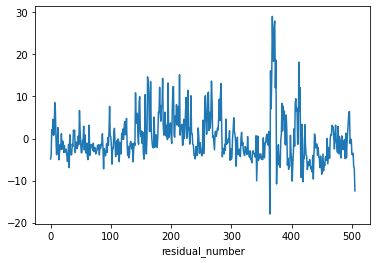

In [66]:
fitted_multi_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

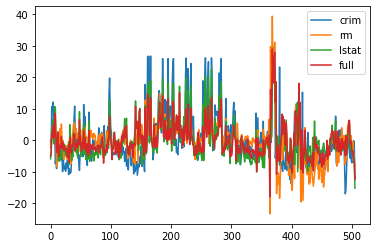

In [68]:
fitted_model1.resid.plot(label='crim')
fitted_model2.resid.plot(label='rm')
fitted_model3.resid.plot(label='lstat')
fitted_multi_model.resid.plot(label='full')
plt.legend()